In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word = imdb.get_word_index()
reverse_word = dict([(value, key) for (key, value) in word.items()])
decoded_review = ' '.join([reverse_word.get(i - 3, '?') for i in train_data[0]])
decoded_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
train = vectorize_sequences(train_data)
test = vectorize_sequences(test_data)

In [9]:
train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
train1 = np.asarray(train_labels).astype('float32')
test1 = np.asarray(test_labels).astype('float32')

In [11]:
#The Keras implementation
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [13]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [14]:
x = train[:10000]
x1 = train[10000:]
y = train1[:10000]
y1 = train1[10000:]

In [15]:
history = model.fit(x1,y1,epochs=20,batch_size=512,validation_data=(x, y))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 0.5865 - binary_accuracy: 0.6990 - val_loss: 0.3790 - val_binary_accuracy: 0.8530
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3030 - binary_accuracy: 0.9044 - val_loss: 0.3399 - val_binary_accuracy: 0.8591
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2157 - binary_accuracy: 0.9306 - val_loss: 0.2752 - val_binary_accuracy: 0.8895
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1651 - binary_accuracy: 0.9485 - val_loss: 0.2788 - val_binary_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1314 - binary_accuracy: 0.9620 - val_loss: 0.2920 - val_binary_accuracy: 0.8839
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1073 - binary_accuracy: 0.9702 - val_loss: 0.3125 - val_binary_accuracy: 0.8837
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

In [16]:
history_dict = history.history
history_dict.keys()
print(history_dict)

{'loss': [0.5033555626869202, 0.29070669412612915, 0.21210213005542755, 0.16825592517852783, 0.13510774075984955, 0.11209958046674728, 0.09141912311315536, 0.07438291609287262, 0.06497854739427567, 0.0515168271958828, 0.040581587702035904, 0.032302841544151306, 0.02977747842669487, 0.018074506893754005, 0.016677146777510643, 0.013341815210878849, 0.012359743937849998, 0.00534402159973979, 0.007719845976680517, 0.0031530812848359346], 'binary_accuracy': [0.7892000079154968, 0.9038666486740112, 0.9296000003814697, 0.9441999793052673, 0.9571333527565002, 0.9649999737739563, 0.9732666611671448, 0.9790666699409485, 0.9821333289146423, 0.9878000020980835, 0.9904000163078308, 0.9936666488647461, 0.9926666617393494, 0.9977999925613403, 0.9973999857902527, 0.9980666637420654, 0.9975333213806152, 0.9998000264167786, 0.9986000061035156, 0.9998666644096375], 'val_loss': [0.3790132403373718, 0.3398890793323517, 0.2751680314540863, 0.2788076102733612, 0.2919768691062927, 0.31251195073127747, 0.31692

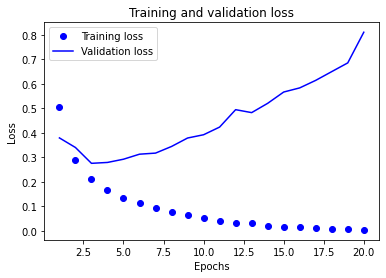

In [17]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

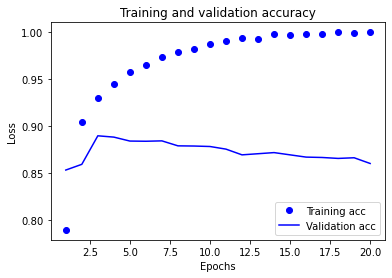

In [18]:
plt.clf() 
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.5476 - accuracy: 0.7397
Epoch 2/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2770 - accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2000 - accuracy: 0.9352
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8832


In [20]:
results

[0.2951664924621582, 0.8831599950790405]

In [21]:
model.predict(x_test)

array([[0.23139662],
       [0.9994018 ],
       [0.8796495 ],
       ...,
       [0.16537431],
       [0.08784682],
       [0.63191855]], dtype=float32)

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 1us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 47ms/step - loss: 3.0274 - accuracy: 0.3714 - val_loss: 1.7187 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.5226 - accuracy: 0.6931 - val_loss: 1.3367 - val_accuracy: 0.7200
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.1088 - accuracy: 0.7723 - val_loss: 1.1558 - val_accuracy: 0.7480
Epoch 4/20
16/16 [==============================] - 0s 15ms/step - loss: 0.8737 - accuracy: 0.8191 - val_loss: 1.0566 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6835 - accuracy: 0.8579 - val_loss: 0.9772 - val_accuracy: 0.8060
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5633 - accuracy: 0.8864 - val_loss: 0.9245 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4270 - accuracy: 0.9132 - val_loss: 0.9133 - val_accuracy: 0.8110
Epoch 8/20
16

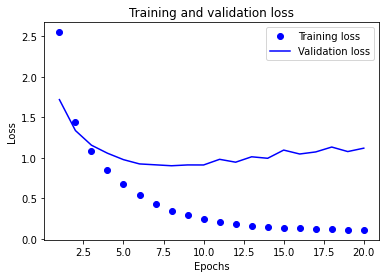

In [15]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

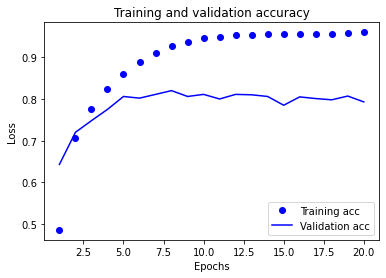

In [16]:
plt.clf() # clears the figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
              partial_y_train,
              epochs=8,
              batch_size=512,
              validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 33ms/step - loss: 3.1712 - accuracy: 0.3738 - val_loss: 1.7617 - val_accuracy: 0.6400
Epoch 2/8
16/16 [==============================] - 0s 20ms/step - loss: 1.5414 - accuracy: 0.6965 - val_loss: 1.3295 - val_accuracy: 0.7100
Epoch 3/8
16/16 [==============================] - 0s 16ms/step - loss: 1.1216 - accuracy: 0.7621 - val_loss: 1.1550 - val_accuracy: 0.7490
Epoch 4/8
16/16 [==============================] - 0s 14ms/step - loss: 0.8791 - accuracy: 0.8115 - val_loss: 1.0424 - val_accuracy: 0.7840
Epoch 5/8
16/16 [==============================] - 0s 15ms/step - loss: 0.6917 - accuracy: 0.8529 - val_loss: 0.9687 - val_accuracy: 0.7990
Epoch 6/8
16/16 [==============================] - 0s 15ms/step - loss: 0.5454 - accuracy: 0.8913 - val_loss: 0.9233 - val_accuracy: 0.8120
Epoch 7/8
16/16 [==============================] - 0s 21ms/step - loss: 0.4433 - accuracy: 0.9164 - val_loss: 0.8974 - val_accuracy: 0.8190
Epoch 8/8
71/71 [===

In [18]:
results

[0.9679279923439026, 0.7902938723564148]

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18699910952804988

In [21]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

1.0000001

In [23]:
np.argmax(predictions[0])

3

In [26]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 11ms/step - loss: 3.0341 - accuracy: 0.3879 - val_loss: 1.8484 - val_accuracy: 0.5700
Epoch 2/20
63/63 [==============================] - 1s 8ms/step - loss: 1.7290 - accuracy: 0.5892 - val_loss: 1.5927 - val_accuracy: 0.5930
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.4586 - accuracy: 0.6164 - val_loss: 1.5204 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 1.3213 - accuracy: 0.6358 - val_loss: 1.4618 - val_accuracy: 0.6250
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.2469 - accuracy: 0.6423 - val_loss: 1.4617 - val_accuracy: 0.6220
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1487 - accuracy: 0.6544 - val_loss: 1.4912 - val_accuracy: 0.6220
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0976 - accuracy: 0.6479 - val_loss: 1.4560 - val_accuracy: 0.6290
Epoch 8/20
63/63 [=

In [11]:
import keras
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [12]:
train_data.shape

(404, 13)

In [13]:
test_data.shape

(102, 13)

In [14]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
from keras import models
from keras import layers
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [17]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [18]:
all_scores

[1.925539493560791, 2.456434488296509, 2.4550373554229736, 2.375185012817383]

In [19]:
np.mean(all_scores)

2.303049087524414

In [21]:
from keras import backend as K
K.clear_session()
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
    [train_data[:i * num_val_samples],
    train_data[(i + 1) * num_val_samples:]],
    axis=0)
    partial_train_targets = np.concatenate(
    [train_targets[:i * num_val_samples],
    train_targets[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


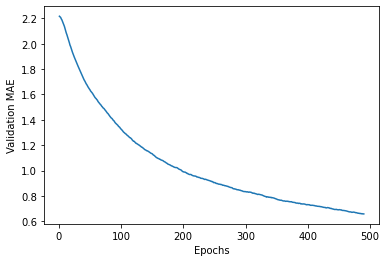

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

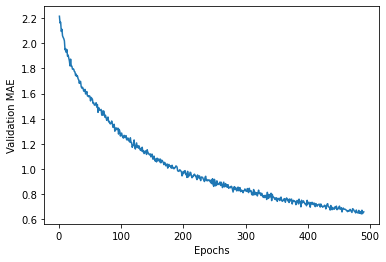

In [25]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [26]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 1ms/step - loss: 15.8822 - mae: 2.5569


In [27]:
test_mae_score

2.55690860748291

In [28]:
predictions = model.predict(test_data)
predictions[0]

array([6.6215653], dtype=float32)